In [121]:
import numpy as np
import pandas as pd
import seaborn as sns

In [122]:
df = sns.load_dataset('tips')

In [123]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [125]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

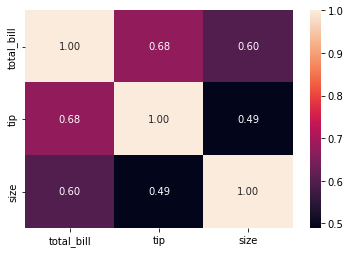

In [126]:
corr = df.corr()

sns.heatmap(corr,annot=True,fmt='.2f')

In [127]:
X = df.drop(columns='tip')
y = df['tip']

In [128]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [129]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [130]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Univariate Analysis

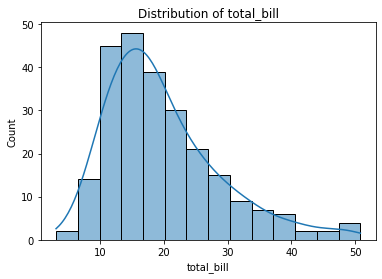

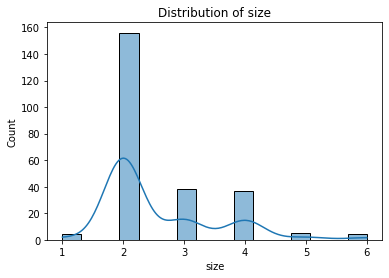

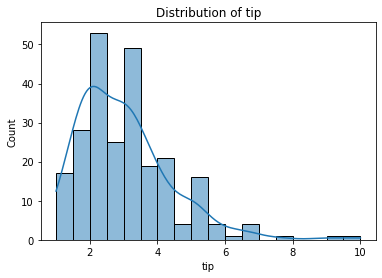

--------------------------------------------------


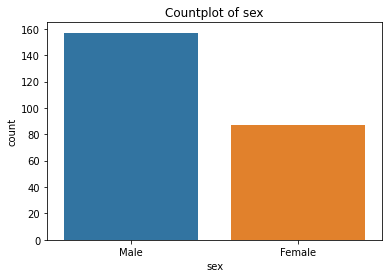

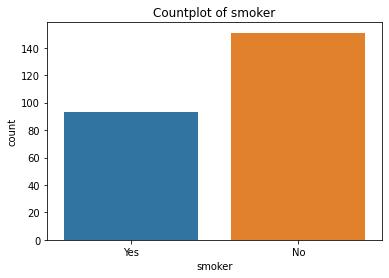

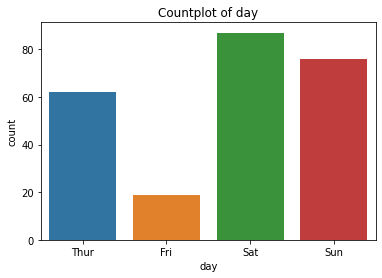

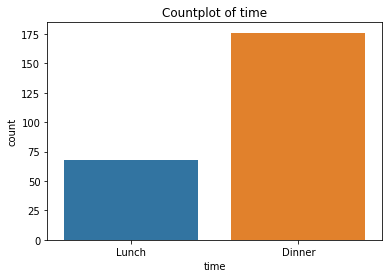

--------------------------------------------------


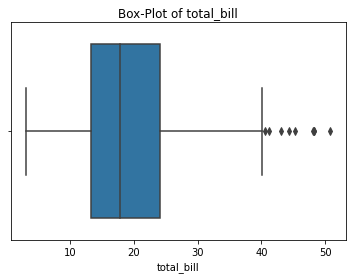

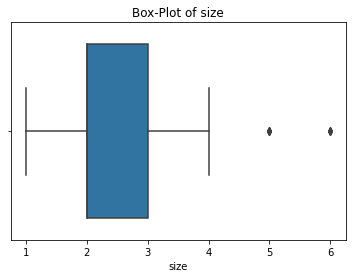

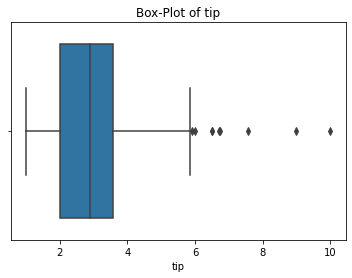

In [131]:
import matplotlib.pyplot as plt

numerical_columns = ['total_bill','size','tip']
categorical_columns = ['sex','smoker','day','time']

#histplot
for col in numerical_columns:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

print('-'*50)    

#countplot
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

print('-'*50)

for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Box-Plot of {col}")
    plt.show()    


## Bivariate/Multivariate

In [132]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


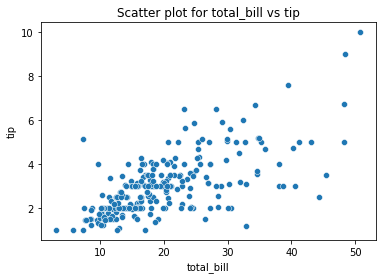

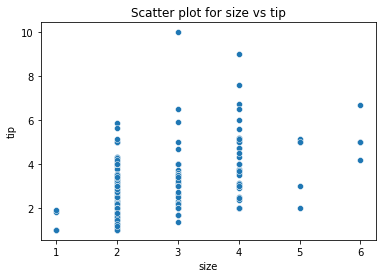

--------------------------------------------------


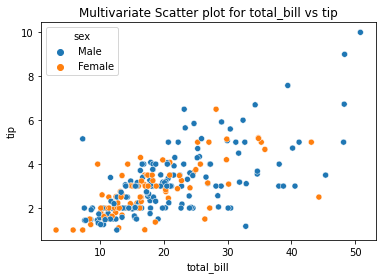

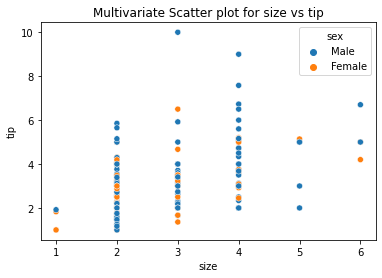

In [133]:
# 1. Numerical- Numerical

#scatter-plot
numerical_columns = ['total_bill','tip','size']

for col in numerical_columns:
    if col != 'tip':
        sns.scatterplot(x=df[col],y=df['tip'])
        plt.title(f"Scatter plot for {col} vs tip")
        plt.xlabel(col)
        plt.ylabel('tip')
        plt.show()
print('-'*50)


#Multivariate
for col in numerical_columns:
    if col != 'tip':
        sns.scatterplot(x=df[col],y=df['tip'],hue=df['sex'])
        plt.title(f"Multivariate Scatter plot for {col} vs tip")
        plt.xlabel(col)
        plt.ylabel('tip')
        plt.show()


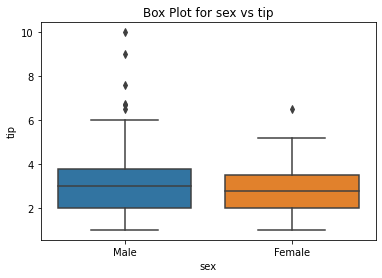

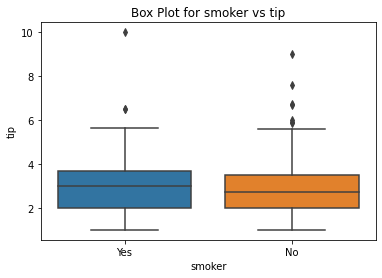

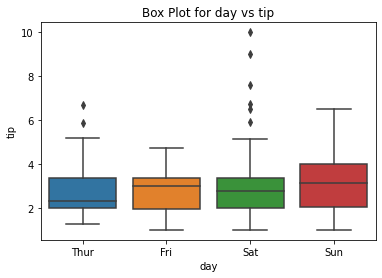

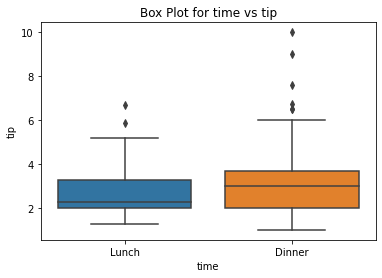

--------------------------------------------------


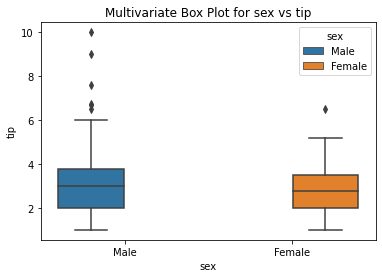

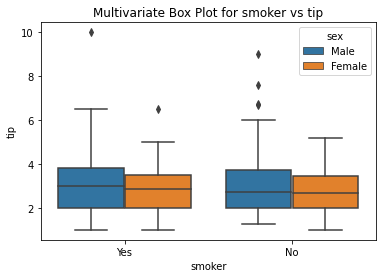

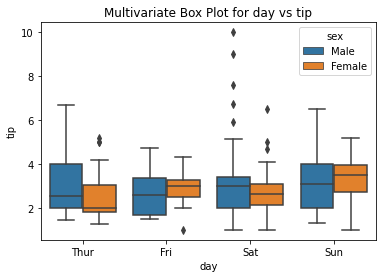

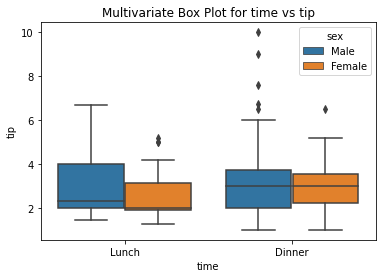

In [134]:
# Numerical - categorical

numerical_cat = ['tip']
categorical_cat = ['sex','smoker','day','time']

for cat in categorical_cat:
    sns.boxplot(x=df[cat],y=df['tip'])
    plt.title(f"Box Plot for {cat} vs tip")
    plt.xlabel(cat)
    plt.ylabel('tip')
    plt.show()

print('-'*50)

#Multivariate
for cat in categorical_cat:
    sns.boxplot(x=df[cat],y=df['tip'],hue=df['sex'])
    plt.title(f"Multivariate Box Plot for {cat} vs tip")
    plt.xlabel(cat)
    plt.ylabel('tip')
    plt.show()


--------------------------------------------------


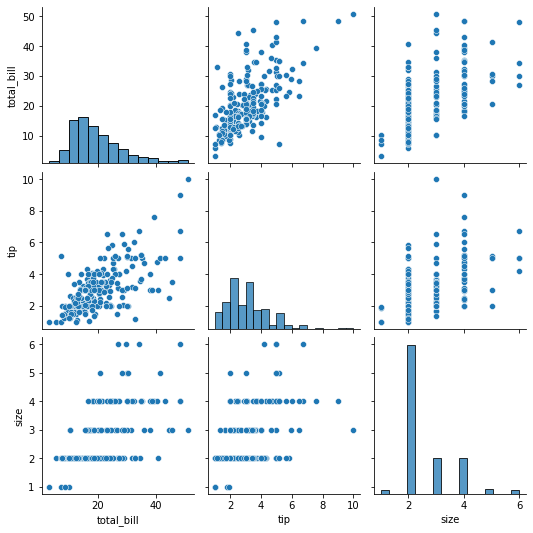

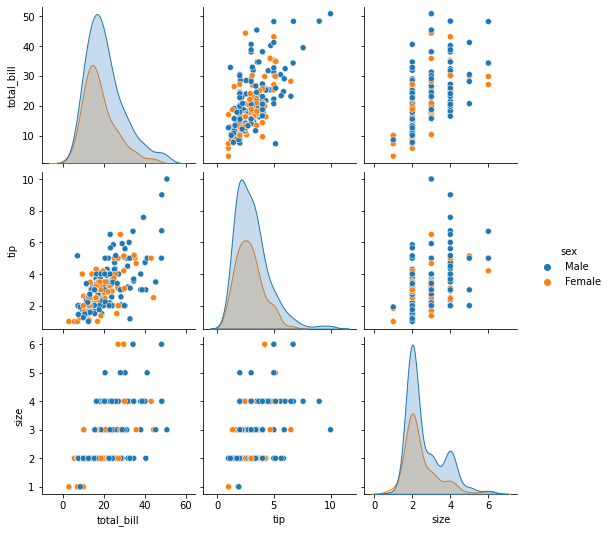

In [135]:
# categorical - categorical

sns.pairplot(df)
print('-'*50)

sns.pairplot(df,hue='sex')


<AxesSubplot:>

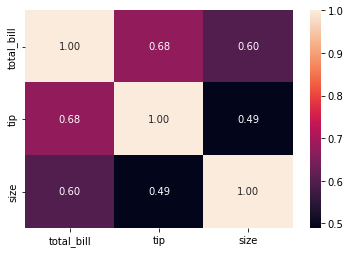

In [136]:
# heatmap

corr = df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

## Preprocessing

In [137]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [138]:
# from sklearn.preprocessing import PowerTransformer

# y = df['tip'].values.reshape(-1,1)
# y_transform = PowerTransformer()
# y = y_transform.fit_transform(y)

In [139]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [141]:
X_train.head()

,total_bill,sex,smoker,day,time,size
228,13.28,Male,No,Sat,Dinner,2
208,24.27,Male,Yes,Sat,Dinner,2
96,27.28,Male,Yes,Fri,Dinner,2
167,31.71,Male,No,Sun,Dinner,4
84,15.98,Male,No,Thur,Lunch,2


In [142]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,RobustScaler
from sklearn.impute import SimpleImputer


numerical_columns = ['total_bill','size']
categorical_columns = ['sex','smoker','day','time']


ohe_encode_columns = ['sex','smoker','day','time']
scaler_columns = ['total_bill','size']
power_transform_columns = ['total_bill','size']
outlier_scaling = ['total_bill','size']

ohe = OneHotEncoder(drop='first',sparse=False)
scalar = StandardScaler()
pw_trans = PowerTransformer()
robust_scale = RobustScaler()
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

clf_tranform = ColumnTransformer(
    transformers= [
        ('ohe',ohe,ohe_encode_columns),
        ('scalar',scalar,scaler_columns),
        ('power_transform',pw_trans,power_transform_columns),
        ('rbs',robust_scale,outlier_scaling),
        

    ],remainder='passthrough'
)






In [143]:
from sklearn.pipeline import Pipeline

preprecoess_pipeline = Pipeline(
    steps= [
        ('preprecoess',clf_tranform)
    ]
)

In [144]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import joblib
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV


algorithms = {
    "random_forest": RandomForestRegressor(max_depth=20,min_samples_split=10),
    "decision_tree": DecisionTreeRegressor(max_depth=None,min_samples_leaf=2),
    "lr": LinearRegression(fit_intercept=True,normalize=False),
    "svm": SVR(C=10,gamma="auto",kernel="rbf"),
    "gb": GradientBoostingRegressor(learning_rate=0.01,n_estimators=200)
}

results = {}
piepline_results = {}

#Hyperparameters tuning with gridsearchcv
param_grid = {
    "random_forest": {
        'algorithm__n_estimators': [100,200,300],
        'algorithm__max_depth': [10,20,None],
        'algorithm__min_samples_split': [2,5,10]
    },
    "decision_tree": {
        'algorithm__max_depth': [10,20,None],
        'algorithm__min_samples_split': [2,5,10],
        'algorithm__min_samples_leaf': [1,2,4]
    },
    "svm": {
        'algorithm__C': [0.1,1,10],
        'algorithm__gamma': ['scale','auto'],
        'algorithm__kernel': ['linear','rbf']
    },
    "lr": {
        "algorithm__fit_intercept": [True,False],
        "algorithm__normalize": [True,False],
        "algorithm__positive": [True,False]
    },
    "gb": {
        "algorithm__n_estimators": [100,200],
        "algorithm__learning_rate": [0.01,0.1],
        # "algorithm__max_depth": [3,5],
        # "algorithm__subsample": [0.8,0.9]
    }
}




for name,algo in algorithms.items():
    piepline = Pipeline(
        steps= [
        ('preprocessor',preprecoess_pipeline),
        ('algorithm',algo)
        ]
        
    )

    piepline.fit(X_train,y_train)

    joblib.dump(piepline,f"{name}.pkl")
    piepline_results[name] = piepline

    y_pred = piepline.predict(X_test)

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    cv_score = cross_val_score(piepline,X_train,y_train,cv=5,scoring='r2')
    cv_mean = cv_score.mean()

    #gridsearch tunning
    grid_search = GridSearchCV(piepline,param_grid[name],cv=5,n_jobs=-1,scoring='r2',verbose=1)
    grid_search.fit(X_train,y_train)

    best_piepline = grid_search.best_estimator_
    best_score = grid_search.best_score_
    y_pred = best_piepline.predict(X_test)

    results[name] = {
        "r2": r2,
        "mse": mse,
        "mae": mae,
        "cv": cv_score,
        "cv_mean": cv_mean
    }

    print(f"{name}")
    print(f"r2 score:{r2}")
    print(f"mse:{mse}")
    print(f"mae:{mae}")
    print(f"cv_score:{cv_score}")
    print(f"cv_mean:{cv_mean}")
    print(f"Best hyperparameters:{grid_search.best_params_}")
    print(f"Best Score:{grid_search.best_score_}")

    print('-'*50)





Fitting 5 folds for each of 27 candidates, totalling 135 fits
random_forest
r2 score:0.2561106374151333
mse:0.9298403872843338
mae:0.7555845652858391
cv_score:[0.08002087 0.55761311 0.51771952 0.62776289 0.08869341]
cv_mean:0.37436196127345794
Best hyperparameters:{'algorithm__max_depth': None, 'algorithm__min_samples_split': 10, 'algorithm__n_estimators': 100}
Best Score:0.38072735750076886
--------------------------------------------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits
decision_tree
r2 score:0.07482604775005852
mse:1.1564409297052154
mae:0.7919727891156461
cv_score:[-0.93671219  0.50317672  0.10221675  0.12969842 -0.19524156]
cv_mean:-0.0793723730586541
Best hyperparameters:{'algorithm__max_depth': 20, 'algorithm__min_samples_leaf': 2, 'algorithm__min_samples_split': 10}
Best Score:0.134718425614981
--------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits
lr
r2 score:0.42390768281848323
mse:0.720098